In [4]:
from __future__ import division
import torch
import numpy as np
import math
from PIL import Image
from matplotlib import pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [5]:
def dirichletDistSample(alphas):
    x = np.zeros([len(alphas),1])
    i = 0
    for a in alphas:
        x[i] = np.random.gamma(a,1)
        i+=1
    sum = np.sum(x)
    return np.divide(x,sum)

In [6]:
def gamma(val):
    return math.factorial(val-1)
    

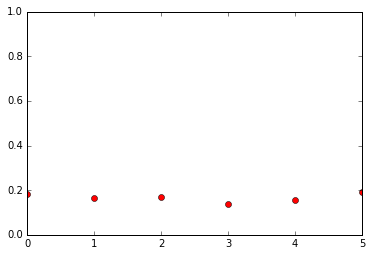

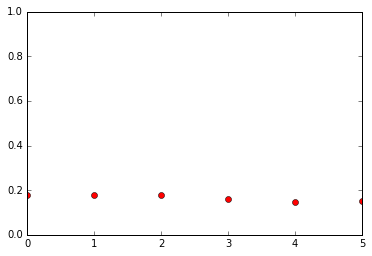

In [5]:
for i in range(2):
    x = [100] *6
    plt.plot(dirichletDistSample(x),'ro')
    plt.axis([0,5,0,1])
    plt.show()

In [6]:
print(np.random.randint(1,16,1))
n_alp = 16
alphas = [.01] * n_alp
sss = np.random.dirichlet(alphas,1)
print(np.asarray(sss))
print(sss.shape)
print(np.random.choice(a = np.arange(0,16), p = np.squeeze(sss)))

[10]
[[6.41908111e-011 3.09416023e-028 6.38928433e-030 5.82030817e-006
  3.01215341e-004 7.32485063e-011 3.32381314e-022 4.23982295e-009
  6.14494823e-003 4.53144512e-016 6.13657830e-015 1.17590225e-040
  1.93327784e-007 6.93151215e-086 2.56717723e-115 9.93547818e-001]]
(1, 16)
15


In [6]:
#alphas and betas are lists containing the parameter values
n_alp = 16
alphas = [.01] * n_alp
n_bet = 10
betas = [.01] * n_bet

def initializeCanvas( alphas ):
    
    canvas = np.zeros([100,100])
    no_of_topics = len(alphas)
    for r in range(100):
        for c in range(100):
            
            canvas[r,c] = np.random.randint(1,16,1) *16
    
    img = Image.fromarray(canvas)
    img.show()
    
    return canvas
initializeCanvas(alphas)

array([[ 16., 144.,  96., ...,  48., 208.,  96.],
       [ 16., 192.,  48., ..., 192.,  16.,  96.],
       [ 16., 240.,  16., ...,  16.,  64., 112.],
       ...,
       [240., 160., 144., ..., 240.,  96.,  64.],
       [ 48., 160., 112., ..., 208., 112., 192.],
       [ 48.,  32., 144., ..., 128., 144.,  16.]])

In [7]:
def noOfTopicsInNeighbourhood(r,c,canvas , window):
    
    counter = np.zeros(16)
    val = canvas[r,c]
    #counter = -1
    for i in range(max(0,r-window),min(canvas.shape[0],r+window)):
        for j in range(max(0,c-window),min(canvas.shape[1],c+window)):
            counter[int(canvas[i,j]/16)-1]=counter[int(canvas[i,j]/16)-1]+1
    #print(counter)
    return counter

In [6]:
def generativeDirichlet(alphas,window):
    #window = 1
    init_canvas = initializeCanvas(alphas)
    for n in range(100):
        
        for r in range(100):
            
            for c in range(100):
                
                n_k = noOfTopicsInNeighbourhood(r,c, init_canvas , window)
                update_arr = np.zeros(len(alphas))
                #print(n)
                #update_arr[int(init_canvas[r,c]/16)-1] = n_k
                update_arr = n_k
                cur_alpha = np.squeeze(np.asarray(alphas))+update_arr
                #cur_alpha = np.divide(cur_alpha,sum(cur_alpha))
                #print(cur_alpha)
                dist = np.random.dirichlet(cur_alpha,1)
                init_canvas[r,c] = np.random.choice(a = np.arange(1,17), p = np.squeeze(dist))*16
        #print(n)
    img = Image.fromarray(init_canvas)
    img.show()
    return init_canvas

In [29]:
def LDA(n_topics , corpus):
    
    
    for doc in corpus:
        
        sent = doc.strip().split(' ')
        for word in sent:
            rng = np.random.random(1)
            if rng < .5:
                
                word
            

In [30]:
n_alp = 16
alphas = [.01] * n_alp
cc = generativeDirichlet(alphas,2)

In [ ]:
cc

A clean method to run the generative part :
    

Performing the LDA on text :

In [ ]:
import nltk
nltk.download('brown')
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
from nltk.corpus import brown
data = []
for fileid in brown.fileids():
    document = ' '.join(brown.words(fileid))
    data.append(document)
    
NO_DOCUMENTS = len(data)
print(NO_DOCUMENTS)
print(data[:2])

In [ ]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords
 
NUM_TOPICS = 10
STOPWORDS = stopwords.words('english')
 
def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in STOPWORDS and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text
 
# For gensim we need to tokenize the data and filter out stopwords
tokenized_data = []
for text in data:
    tokenized_data.append(clean_text(text))

    
#print(data[0])
#print(tokenized_data[0])
# Build a Dictionary - association word to numeric id
dictionary = corpora.Dictionary(tokenized_data)
 
# Transform the collection of texts to a numerical form
corpus = [dictionary.doc2bow(text) for text in tokenized_data]
 
# Have a look at how the 20th document looks like: [(word_id, count), ...]
#print(corpus[20])
# [(12, 3), (14, 1), (21, 1), (25, 5), (30, 2), (31, 5), (33, 1), (42, 1), (43, 2),  ...
 
# Build the LDA model
lda_model = models.LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)
 
# Build the LSI model
lsi_model = models.LsiModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)

In [ ]:
type(corpus)

In [ ]:
print("LDA Model:")
 
for idx in range(NUM_TOPICS):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))
print("=" * 20)
 
print("LSI Model:")
 
for idx in range(NUM_TOPICS):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lsi_model.print_topic(idx, 20))
print("=" * 20)

In [ ]:
print(tokenized_data[0])

In [7]:
#given a blank dictionary, the number of topics and the vocab, this fuction creates a blank slate to write the topics
#in the randomTopicInit() method
def createTopicDicts(dict_topics , no_of_topics , vocab):
    
    tstr = "topic"
    for i in range(1,no_of_topics+1):
        dict_topics[tstr+str(i)] = {}
        for word in vocab:
            dict_topics[tstr+str(i)][str(word)] = 0
        dict_topics[tstr+str(i)]["total_words"] = 0
    print("created_topic_dict", dict_topics )
    return dict_topics

In [8]:
dict_topics = {}
vocab = []
for i in range(100):
    vocab.append(i) 
dict_topics = createTopicDicts(dict_topics , 10 , vocab)
dict_topics

('created_topic_dict', {'topic9': {'total_words': 0, '24': 0, '25': 0, '26': 0, '27': 0, '20': 0, '21': 0, '22': 0, '23': 0, '28': 0, '29': 0, '0': 0, '4': 0, '8': 0, '59': 0, '58': 0, '55': 0, '54': 0, '57': 0, '56': 0, '51': 0, '50': 0, '53': 0, '52': 0, '88': 0, '89': 0, '82': 0, '83': 0, '80': 0, '81': 0, '86': 0, '87': 0, '84': 0, '85': 0, '3': 0, '7': 0, '39': 0, '38': 0, '33': 0, '32': 0, '31': 0, '30': 0, '37': 0, '36': 0, '35': 0, '34': 0, '60': 0, '61': 0, '62': 0, '63': 0, '64': 0, '65': 0, '66': 0, '67': 0, '68': 0, '69': 0, '2': 0, '6': 0, '99': 0, '98': 0, '91': 0, '90': 0, '93': 0, '92': 0, '95': 0, '94': 0, '97': 0, '96': 0, '11': 0, '10': 0, '13': 0, '12': 0, '15': 0, '14': 0, '17': 0, '16': 0, '19': 0, '18': 0, '48': 0, '49': 0, '46': 0, '47': 0, '44': 0, '45': 0, '42': 0, '43': 0, '40': 0, '41': 0, '1': 0, '5': 0, '9': 0, '77': 0, '76': 0, '75': 0, '74': 0, '73': 0, '72': 0, '71': 0, '70': 0, '79': 0, '78': 0}, 'topic8': {'total_words': 0, '24': 0, '25': 0, '26': 0, 

{'topic1': {'0': 0,
  '1': 0,
  '10': 0,
  '11': 0,
  '12': 0,
  '13': 0,
  '14': 0,
  '15': 0,
  '16': 0,
  '17': 0,
  '18': 0,
  '19': 0,
  '2': 0,
  '20': 0,
  '21': 0,
  '22': 0,
  '23': 0,
  '24': 0,
  '25': 0,
  '26': 0,
  '27': 0,
  '28': 0,
  '29': 0,
  '3': 0,
  '30': 0,
  '31': 0,
  '32': 0,
  '33': 0,
  '34': 0,
  '35': 0,
  '36': 0,
  '37': 0,
  '38': 0,
  '39': 0,
  '4': 0,
  '40': 0,
  '41': 0,
  '42': 0,
  '43': 0,
  '44': 0,
  '45': 0,
  '46': 0,
  '47': 0,
  '48': 0,
  '49': 0,
  '5': 0,
  '50': 0,
  '51': 0,
  '52': 0,
  '53': 0,
  '54': 0,
  '55': 0,
  '56': 0,
  '57': 0,
  '58': 0,
  '59': 0,
  '6': 0,
  '60': 0,
  '61': 0,
  '62': 0,
  '63': 0,
  '64': 0,
  '65': 0,
  '66': 0,
  '67': 0,
  '68': 0,
  '69': 0,
  '7': 0,
  '70': 0,
  '71': 0,
  '72': 0,
  '73': 0,
  '74': 0,
  '75': 0,
  '76': 0,
  '77': 0,
  '78': 0,
  '79': 0,
  '8': 0,
  '80': 0,
  '81': 0,
  '82': 0,
  '83': 0,
  '84': 0,
  '85': 0,
  '86': 0,
  '87': 0,
  '88': 0,
  '89': 0,
  '9': 0,
  '90': 0,

In [9]:
def createDocDicts(dict_docs,doc_counter,no_of_topics):
    dict_docs[str("doc"+str(doc_counter))] = {}
    dict_docs[str("doc"+str(doc_counter))]["total_topics"] = 0
    for i in range(1,no_of_topics+1):
        dict_docs[str("doc"+str(doc_counter))]["topic"+str(i)] = 0
    return dict_docs

In [10]:
#where vocab is a list which contains all the possible words that are there
#in case of the image topic modelling, it will be simple class values.  eg 1,2,.....1024.... etc
#each topic should have all the words present in the vocab
def randomTopicInit(corpus , no_of_topics , vocab):
    #document and topic counter starts from 0
    dict_topics = {}
    dict_docs = {}
    corpus_topic_dict = {}
    doc_counter = 1
    dict_topics = createTopicDicts(dict_topics , no_of_topics , vocab)
    print("TYPE OF CORPUS",type(corpus))
    for doc in corpus:
     
        if str("doc"+str(doc_counter)) not in dict_docs.keys():
            #dict_docs[str("doc"+str(doc_counter))] = {}
            #dict_docs[str("doc"+str(doc_counter))]["total_topics"] = 0
            dict_docs = createDocDicts(dict_docs,doc_counter,no_of_topics)
        doc_topic_list = []
        print(doc)
        for word in doc:
                word = str(word)
                word = word.encode("ascii")
                cur_topic = np.random.randint(1,no_of_topics+1)
                doc_topic_list.append((word,str(cur_topic)))
                if  str("topic"+str(cur_topic)) not in dict_topics.keys():
                    dict_topics[str("topic"+str(cur_topic))] = {}
                    dict_topics[str("topic"+str(cur_topic))]["total_words"] = 0
                #print(dict_topics)
                if word not in dict_topics[str("topic"+str(cur_topic))].keys():
                    dict_topics[str("topic"+str(cur_topic))][word] = 1
                else:
                    dict_topics[str("topic"+str(cur_topic))][word] = dict_topics[str("topic"+str(cur_topic))][word]+1
                dict_topics[str("topic"+str(cur_topic))]["total_words"]+=1
                #print(dict_docs)
                if str("topic"+str(cur_topic)) not in dict_docs[str("doc"+str(doc_counter))].keys():
                    dict_docs[str("doc"+str(doc_counter))][str("topic"+str(cur_topic))] = 1
                else:
                    dict_docs[str("doc"+str(doc_counter))][str("topic"+str(cur_topic))] = dict_docs[str("doc"+str(doc_counter))][str("topic"+str(cur_topic))]+1
                dict_docs[str("doc"+str(doc_counter))]["total_topics"]+=1
    
        if "doc"+str(doc_counter) not in corpus_topic_dict.keys():
            corpus_topic_dict["doc"+str(doc_counter)] = []
        corpus_topic_dict["doc"+str(doc_counter)] = doc_topic_list
        doc_counter+=1
    return dict_topics,dict_docs, corpus_topic_dict

In [ ]:
dict_topics, dict_docs ,corpus_topic_list = randomTopicInit(tokenized_data[0:10] , 10)

In [ ]:
#dict_topics["topic4"]["total_words"]
#dict_docs
corpus_topic_list['doc1'][2]

In [11]:
#takes in a situation and then returns the updated topic of that particular word
#all the other adjustments are done inside
def updateTopic(word ,word_counter, doc ,dict_topics , dict_docs , prev_topic,corpus_topic_dict, alpha , beta , no_of_topics):
    word = word.encode("ascii")
    #print("checking",word)
    topic_probs = np.zeros(no_of_topics+1)
    for i in range(1,no_of_topics+1):
        #print("checking Topic", i)
        #print(dict_topics[str("topic"+str(i))])
        #here n_v_k is calculated from the entire document. And each image is a document.
        #in the paper, a part of the image also called a cell serves as a document
        #so for a given image, there are multiple documents that are spatially divided.
        if word in dict_topics[str("topic"+str(i))].keys():
            n_v_k = (dict_topics[str("topic"+str(i))][word]-1)+beta 
        else:
            n_v_k = beta
        #print(n_v_k)
        n_v_k_sum = (dict_topics[str("topic"+str(i))]["total_words"]-1) + len(dict_topics[str("topic"+str(i))].keys())*beta
        if (i==prev_topic):
            n_k_g = dict_docs[doc][str("topic"+str(i))]-1+alpha
            n_k_g_sum = dict_docs[doc]["total_topics"]-1+ len(dict_docs[doc].keys())*alpha
        else:
            n_k_g = dict_docs[doc][str("topic"+str(i))]+alpha
            n_k_g_sum = dict_docs[doc]["total_topics"]+ len(dict_docs[doc].keys())*alpha

        topic_probs[i] = float(n_v_k/n_v_k_sum)*float(n_k_g/n_k_g_sum)
        
    #print(topic_probs)
    topic_probs = np.divide(topic_probs,sum(topic_probs))
    new_topic = np.random.choice(a=np.arange(1,no_of_topics+1),p = topic_probs[1:]) #here topics start from 0 - no_of_topics so, +1 is addded to the final result to make the 
    #output match the previously followed convention
    
    #print("prev_topic - new_topic" , prev_topic , new_topic)
    dict_docs[doc][str("topic"+str(new_topic))]+=1
    dict_docs[doc][str("topic"+str(prev_topic))]-=1
    if dict_docs[doc][str("topic"+str(prev_topic))]<0:
        exit()
    dict_topics[str("topic"+str(prev_topic))][word]-=1
    dict_topics[str("topic"+str(prev_topic))]["total_words"]-=1
    if word in dict_topics[str("topic"+str(new_topic))].keys():
        dict_topics[str("topic"+str(new_topic))][word]+=1
    else:
        dict_topics[str("topic"+str(new_topic))][word] =1
    dict_topics[str("topic"+str(new_topic))]["total_words"]+=1
    #print(word_counter)
    #print(len(corpus_topic_dict[doc]))
    corpus_topic_dict[doc][word_counter]=(word,str(new_topic))
    return  dict_topics , dict_docs ,corpus_topic_dict
    

In [12]:
def inferTopicsOfNewObservations( corpus , dict_topics , dict_docs ,no_of_topics , alpha , beta):
    key = "doc"
    corpus_topic_dict = {}
    no_of_words = len(dict_topics["topic1"].keys())-1 #total_words is a key which is not a word
    #print(type(no_of_topics))
    #print(no_of_topics)
    prob_arr = np.zeros((no_of_topics+1))
    for i in range(len(corpus)):
        #doc is an nd array
        doc_word_topic_list = []
        for w in corpus[i]:
            #w is the type of word ( it is a number)
            for k in range(1,no_of_topics+1):
                #print('i',i)
                #print('w',w)
                #print('k',k)
                n_v_k = dict_topics["topic"+str(k)][str(w)]+beta
                n_v_k_sum = dict_topics["topic"+str(k)]["total_words"]+no_of_words*beta
                n_k_g = dict_docs["doc"+str(i+1)]["topic"+str(k)] +alpha
                n_k_g_sum = dict_docs["doc"+str(i+1)]["total_topics"]+ no_of_topics*beta
                prob_arr[k] = (n_v_k/n_v_k_sum)*(n_k_g/n_k_g_sum)
                #print('prob_arr',prob_arr)
                prob_arr = np.divide(prob_arr,sum(prob_arr))
                #print('prob_arr_normalized',prob_arr)
            new_topic = np.random.choice(a=np.arange(1,no_of_topics+1),p = prob_arr[1:])
            dict_docs["doc"+str(i+1)]["topic"+str(new_topic)]+=1
            dict_docs["doc"+str(i+1)]["total_topics"]+=1
            dict_topics["topic"+str(new_topic)][str(w)]+=1
            dict_topics["topic"+str(new_topic)]['total_words']+=1
            doc_word_topic_list.append((str(w),str(new_topic)))
        corpus_topic_dict["doc"+str(i+1)] = doc_word_topic_list
    return dict_docs, dict_topics,corpus_topic_dict

In [13]:
def updateTopicsFromCorpus(corpus , vocab ,dict_topics, dict_docs , corpus_topic_dict ,no_of_topics , alpha , beta , n_iter):
    #print("DICT_docsdddddd",dict_docs)
    #print("DICT_topicsddddddd",dict_topics)
    for n in range(n_iter):
        #print("iteration",n)
        #print("corpus_topic_dict",corpus_topic_dict)
        #print(corpus_topic_list[4][12])
        doc_no = 1
        for doc in corpus_topic_dict.keys():
            #print(corpus_topic_dict[doc])
            word_counter = 0
            for word,topic in corpus_topic_dict[doc]:
                #print(word,topic)
                #print(dict_topics["topic"+str(topic)].keys())
                prev_topic = topic
                dict_topics, dict_word , corpus_topic_dict = updateTopic(word,word_counter, doc ,dict_topics , dict_docs , prev_topic ,corpus_topic_dict, alpha , beta ,no_of_topics)
                word_counter+=1
            doc_no+=1
    return dict_topics, dict_docs , corpus_topic_dict
                           

In [14]:
def generateTopicsFromCorpus(corpus , vocab ,no_of_topics , alpha , beta , n_iter ):
    
    dict_topics, dict_docs , corpus_topic_dict = randomTopicInit(corpus, no_of_topics ,vocab)
    #print("DICT_docsdddddd",dict_docs)
    #print("DICT_topicsddddddd",dict_topics)
    for n in range(n_iter):
        #print("iteration",n)
        #print("corpus_topic_dict",corpus_topic_dict)
        #print(corpus_topic_list[4][12])
        doc_no = 1
        for doc in corpus_topic_dict.keys():
            #print(corpus_topic_dict[doc])
            word_counter = 0
            for word,topic in corpus_topic_dict[doc]:
                #print(word,topic)
                #print(dict_topics["topic"+str(topic)].keys())
                prev_topic = topic
                dict_topics, dict_word , corpus_topic_dict = updateTopic(word,word_counter, doc ,dict_topics , dict_docs , prev_topic ,corpus_topic_dict, alpha , beta ,no_of_topics)
                word_counter+=1
            doc_no+=1
    return dict_topics, dict_docs , corpus_topic_dict
    
    
    

In [14]:
1/1201
type(tokenized_data)

NameError: name 'tokenized_data' is not defined

In [ ]:
dict_topics , dict_docs = generateTopicsFromCorpus(tokenized_data[:3] , 2 , .01 , 1 , 300)

In [ ]:
A = dict_topics["topic2"]
sorted(A, key=A.get, reverse=True)[:40]

In [ ]:
#print(corpus[20])
lda_model = models.LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)

In [ ]:
print("LDA Model:")
 
for idx in range(NUM_TOPICS):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))
 
print("=" * 20)
 
print("LSI Model:")
 
for idx in range(NUM_TOPICS):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lsi_model.print_topic(idx, 10))
 
print("=" * 20)

In [15]:
#given a particular image matrix, this function is responsible for extracting a set (number of features mentioned in 
#thresh) of features (SIFT/SURF) 
import cv2 as cv
from matplotlib import pyplot as plt
def extractSURFFeaturesFromImages( imgfilename , thresh): 
    
    img = cv.imread(imgfilename)
    print(imgfilename)
    surf = cv.xfeatures2d.SURF_create(thresh)
    kp, des = surf.detectAndCompute(img,None)
    #print(len(kp))
    #img2 = cv.drawKeypoints(img,kp,None,(255,0,0),4)
    #plt.imshow(img2),plt.show()
    if (type(des)!=type(None)):
        print(des.shape)
    return (kp, des)
    

In [13]:
(kp ,des) = extractSURFFeaturesFromImages('dota.jpg',3000)
type(des)

dota.jpg
(67, 64)


numpy.ndarray

In [17]:
type(des)

numpy.ndarray

createWordClusters() : this function takes in a directory, reads all the images, extract SURF features from them and generates standardized words based on K means clustering. <br>
imgdir : absolute path for the directory that contains the images <br>
no_of_clusters : number of clusters wanted to be generated<br>
thresh : threshold for the SURF feature generation

In [16]:
from sklearn.cluster import KMeans
from random import shuffle
import numpy as np

#given a list of features, this function applies a kmeans clustering algo on them to generate a set of words out of the 
#features obtained from the image
def createClustersFromFeatures(feat_list , no_of_clusters):
    print(len(feat_list))
    #shuffle(feat_list)
    feat_list = feat_list[0:10000]
    print(len(feat_list))
    kmeans = KMeans(n_clusters = no_of_clusters , random_state = 0).fit(feat_list)
    return kmeans

In [17]:
import os
#no_of_clusters translates to the number of words in the vocab for the topic model
def createWordClusters(imgdir , no_of_clusters , thresh):
    
    feat_arr = np.zeros([1,64])
    for root,dirs,files in os.walk(imgdir):
        filelist = files
        break
    #print(filelist)
    count = 0
    for indiv_file in filelist:
        print count
        count+=1
        if count>2000:
            break
        new_path = os.path.join(imgdir,indiv_file)
        (kp,des) = extractSURFFeaturesFromImages(new_path,thresh)
        if (type(des)!=type(None)):
            feat_arr = np.concatenate((feat_arr,des), axis = 0)
        #print(feat_arr.shape)
    cluster_for_img_features = createClustersFromFeatures(feat_arr , no_of_clusters)
    return cluster_for_img_features
        
    
    

In [18]:
#given an imagefile and cluster information and threshold value for SURF 
#this function first extracts SURF features from the image based on the threshold provided
#and then groups them into the closest clusters
def extractWordsFromImages( cluster , imgfile ,thresh):
    (kp,des) = extractSURFFeaturesFromImages(imgfile,thresh)
    words = cluster.predict(des)
    return words,kp
    
    

In [14]:
words,kp = extractWordsFromImages(clust , 'outdoors.jpg' , 15000)

NameError: name 'clust' is not defined

In [ ]:
words

In [15]:
vocab = []
maxval = max(words)
for i in range(maxval+1):
    vocab.append(i)
print(vocab)

NameError: name 'words' is not defined

In [ ]:
corpus = []
corpus.append(words)
dict_topics,dict_docs, corpus_topic_dict = generateTopicsFromCorpus(corpus, vocab , 20 , .001 , 2 , 10)

In [19]:
#generates a random color for each of the topic and returns a
#dictionary where each topic is associated with an RGB tuple
def topicToColor(no_of_topics):
    topic_color_dict = {}
    for i in range(1,no_of_topics+1):
        r = np.random.randint(255)
        g = np.random.randint(255)
        b = np.random.randint(255)
        topic_color_dict[i] = (r,g,b)
    return topic_color_dict

In [20]:
#given an imagefile name, a dictionary that says which word belongs to which topic and a list of 
#keypoints that holds the positions of the above mentioned words, this function plots the words
#onto the image based on the topic for the word (a different color for each topic)
def displayTopicModelling(corpus_topic_dict,no_of_topics,keypoints,imagefilename ,topic_color_dict):
    #img = cv.imread(imagefilename)
    img = imagefilename
    dpi = 80
    height , width , depth = img.shape
    #topic_color_dict = topicToColor(no_of_topics)
    figsize = width / float(dpi), height /float(dpi)
    lists = corpus_dictToList(corpus_topic_dict)
    #print("Lists",lists)
    for i in range(len(lists)):
        word_list = lists[i]
        cur_keypoints = keypoints[i]
        #print("word_list",len(word_list))
        word_arr = np.asarray(word_list)
        topicwise_kp = []
        for i in range(1,no_of_topics+1):
            #print i
            #print word_arr
            w_arr = np.where(word_arr==i)
            #print w_arr[0]
            #print(keypoints[np.where(word_arr==i)])
            #print ("WARRRRR",len(w_arr[0]))
            #print("keypoints",len(cur_keypoints))
            topicwise_kp = [cur_keypoints[j] for j in w_arr[0]]
            img = cv.drawKeypoints(img,topicwise_kp,None,topic_color_dict[i],4)  
    #cv.namedWindow("Final result")
    ####cv.namedWindow("output", cv.WINDOW_NORMAL) 
    #%matplotlib qt
    
    '''
    fig = plt.figure(figsize = figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.imshow(img , cmap='gray')
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()
    '''
    
    #display_image_in_actual_size(imagefilename)
    #cv.imshow(img)
    #cv.waitKey(0)
    return img
    

In [21]:
list_of_docs = []
#corpus_topic_dict is a dictionary that stores the topic value of each of the words in the corpus
def corpus_dictToList(corpus_topic_dict):
    list_of_docs = []
    for i in range(1,len(corpus_topic_dict.keys())+1):
        doc = "doc"+str(i)
        #print doc
        #print(corpus_topic_dict[doc])
        list_of_keypoints = []
        #print("Type of doc is ", type(corpus_topic_dict[doc]))
        #print("jkasdfhkasdfk",corpus_topic_dict)
        for word in corpus_topic_dict[doc]:
            (wordval,topic) = word
            #print(type(word))
            list_of_keypoints.append(int(topic))
        list_of_docs.append(list_of_keypoints)
        #print(list_of_keypoints)
    return list_of_docs

In [21]:
sssp = corpus_dictToList(corpus_topic_dict)
sssp , kp_corpus

NameError: name 'corpus_topic_dict' is not defined

In [22]:
def display_image_in_actual_size(im_path):

    dpi = 80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [ ]:
displayTopicModelling(corpus_topic_dict , 20 ,kp_corpus , 'duck.jpg')

In [ ]:
kp_corpus

In [ ]:
corpus_topic_dict

In [23]:
#vocab = []
#no_of_words = 100
#maxval = max(words)
#for i in range(maxval+1):
#    vocab.append(i)
#print(vocab)
def topicModellingPipeline( imgfilename , word_cluster , vocab, no_of_topics ,thresh):
    
    words,kp = extractWordsFromImages(word_cluster , imgfilename , thresh)
    print("words",words)
    corpus = []
    corpus.append(words)
    dict_topics,dict_docs, corpus_topic_dict = generateTopicsFromCorpus(corpus, vocab , no_of_topics , .01 , 1 , 2)
    final_img = displayTopicModelling(corpus_topic_dict , no_of_topics ,kp , imgfilename)
    return final_img

In [24]:
vocab = []
no_of_words = 100
no_of_topics = 10
thresh = 6500

#maxval = max(no_of_words)
for i in range(no_of_words):
    vocab.append(i)
print(vocab)
clust = createWordClusters("/home/abhisek/Study/Robotics/yolo/testImgdir" , no_of_words , thresh)
iing = topicModellingPipeline('dota.jpg' , clust , vocab , no_of_topics , thresh)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
0
/home/abhisek/Study/Robotics/yolo/testImgdir/wallpapersden.com_game-of-thrones-dragon-minimalist_5472x3242.jpg
(32, 64)
1
/home/abhisek/Study/Robotics/yolo/testImgdir/outdoors.jpg
(427, 64)
2
/home/abhisek/Study/Robotics/yolo/testImgdir/ubuntu_logo-wallpaper-2560x1440.jpg
(111, 64)
3
/home/abhisek/Study/Robotics/yolo/testImgdir/pWNgnmO.jpg
(113, 64)
4
/home/abhisek/Study/Robotics/yolo/testImgdir/test.jpg
(17, 64)
5
/home/abhisek/Study/Robotics/yolo/testImgdir/chaos-knight-wallpapers-dota-2-hd-wallpapers-4.jpg
(56, 64)
757
757
dota.jpg
(16, 64)
('words', array([12, 40, 66, 18, 81, 68, 19, 30, 56, 67, 

TypeError: displayTopicModelling() takes exactly 5 arguments (4 given)

In [ ]:
lists = corpus_dictToList(corpus_topic_dict)
lists

As of now the topic modelling is considering the entire image for its document which is not the case in the thesis, where a certain boundary of say 1,2,5 pixel width is used to denote a single topic. How to do that?
1. seperate the images into small parts based on the size of the window.
2. run the already implemented in each of these small parts of the image. 
3. Hope for the best.

Remember:
1. corpus = a list of ndarrays, where each ndarray contains the number of words present in a single document. In case the image is broken into multiple small patches where each small patch translates to a document.
2. corpus_topic_dict = a dictionary of documents, where for each document, which word belongs to which topic is given.
3. dict_docs = dictionary of documents(contains the distribution of topics for each document)
4. dict_topics = dictionary of topics (contains the distribution of words for each topic)

In [28]:
#this function will divide a given image into different parts on which the entire previous pipeline will work.
#given an imagename, and a window size, this function will extract small patches of images on which the pipeline 
#be called.
import cv2 as cv
from matplotlib import pyplot as plt


def fromImageToCellsToCorpus( cluster ,img , cellsize , thresh):
    img = img
    row,col,_ = img.shape
    prev_r = 0
    doc_dict = {}
    corpus = []
    kp_corpus = []
    counter = 1
    surf = cv.xfeatures2d.SURF_create(thresh)
    for r in range(cellsize,row,cellsize):
        prev_c = 0
        for c in range(cellsize,col, cellsize):
            counter+=1
            curblock = img[prev_r:r,prev_c:c,:]
            #do necessary computations
            #doc_dict[base_str+str(counter)] = {}
            #print(prev_r , r)
            #print(prev_c ,c)
            cur_kp,cur_des = surf.detectAndCompute(curblock,None)
            ######img2 = cv.drawKeypoints(curblock,cur_kp,None,(255,0,0),4)
            ######plt.imshow(img2),plt.show()
            cur_words = np.empty( shape=(0, 0) )
            if type(cur_des)!=type(None):
                #dsfsd
                cur_words = cluster.predict(cur_des)

            #prev_r = r
            ##plt.figure()
            ##plt.imshow(curblock)
            #kp_pt[0] is the x ie the column
            #kp_pt[1] is the y ie the row
            for kp_pt in cur_kp:
                temp_c = kp_pt.pt[0]+prev_c
                temp_r = kp_pt.pt[1]+prev_r
                kp_pt.pt = (temp_c,temp_r)
            kp_corpus.append(cur_kp)
            corpus.append(cur_words)
            prev_c = c
        prev_r = r
    #print("counter",counter)  
    return corpus,kp_corpus

In [25]:
cluster = createWordClusters("/home/abhisek/Study/Robotics/yolo/val2017" , 20 , 2000)

0
/home/abhisek/Study/Robotics/yolo/val2017/000000031050.jpg
(434, 64)
1
/home/abhisek/Study/Robotics/yolo/val2017/000000036844.jpg
(547, 64)
2
/home/abhisek/Study/Robotics/yolo/val2017/000000042276.jpg
(319, 64)
3
/home/abhisek/Study/Robotics/yolo/val2017/000000017714.jpg
(190, 64)
4
/home/abhisek/Study/Robotics/yolo/val2017/000000016228.jpg
(914, 64)
5
/home/abhisek/Study/Robotics/yolo/val2017/000000064868.jpg
(252, 64)
6
/home/abhisek/Study/Robotics/yolo/val2017/000000022705.jpg
(210, 64)
7
/home/abhisek/Study/Robotics/yolo/val2017/000000039405.jpg
(300, 64)
8
/home/abhisek/Study/Robotics/yolo/val2017/000000055167.jpg
(507, 64)
9
/home/abhisek/Study/Robotics/yolo/val2017/000000057244.jpg
(1472, 64)
10
/home/abhisek/Study/Robotics/yolo/val2017/000000047121.jpg
(112, 64)
11
/home/abhisek/Study/Robotics/yolo/val2017/000000019042.jpg
(758, 64)
12
/home/abhisek/Study/Robotics/yolo/val2017/000000029984.jpg
(157, 64)
13
/home/abhisek/Study/Robotics/yolo/val2017/000000001268.jpg
(435, 64)
1

(1246, 64)
115
/home/abhisek/Study/Robotics/yolo/val2017/000000018737.jpg
(567, 64)
116
/home/abhisek/Study/Robotics/yolo/val2017/000000056288.jpg
(238, 64)
117
/home/abhisek/Study/Robotics/yolo/val2017/000000061960.jpg
(165, 64)
118
/home/abhisek/Study/Robotics/yolo/val2017/000000063740.jpg
(589, 64)
119
/home/abhisek/Study/Robotics/yolo/val2017/000000044590.jpg
(378, 64)
120
/home/abhisek/Study/Robotics/yolo/val2017/000000031093.jpg
(112, 64)
121
/home/abhisek/Study/Robotics/yolo/val2017/000000036678.jpg
(237, 64)
122
/home/abhisek/Study/Robotics/yolo/val2017/000000046804.jpg
(512, 64)
123
/home/abhisek/Study/Robotics/yolo/val2017/000000035963.jpg
(536, 64)
124
/home/abhisek/Study/Robotics/yolo/val2017/000000012667.jpg
(201, 64)
125
/home/abhisek/Study/Robotics/yolo/val2017/000000046497.jpg
(280, 64)
126
/home/abhisek/Study/Robotics/yolo/val2017/000000033368.jpg
(321, 64)
127
/home/abhisek/Study/Robotics/yolo/val2017/000000024243.jpg
(333, 64)
128
/home/abhisek/Study/Robotics/yolo/va

(1296, 64)
230
/home/abhisek/Study/Robotics/yolo/val2017/000000020107.jpg
(117, 64)
231
/home/abhisek/Study/Robotics/yolo/val2017/000000059386.jpg
(303, 64)
232
/home/abhisek/Study/Robotics/yolo/val2017/000000022371.jpg
(112, 64)
233
/home/abhisek/Study/Robotics/yolo/val2017/000000035326.jpg
(296, 64)
234
/home/abhisek/Study/Robotics/yolo/val2017/000000038576.jpg
(485, 64)
235
/home/abhisek/Study/Robotics/yolo/val2017/000000020992.jpg
(123, 64)
236
/home/abhisek/Study/Robotics/yolo/val2017/000000030675.jpg
(476, 64)
237
/home/abhisek/Study/Robotics/yolo/val2017/000000019402.jpg
(173, 64)
238
/home/abhisek/Study/Robotics/yolo/val2017/000000054654.jpg
(573, 64)
239
/home/abhisek/Study/Robotics/yolo/val2017/000000052462.jpg
(366, 64)
240
/home/abhisek/Study/Robotics/yolo/val2017/000000019786.jpg
(93, 64)
241
/home/abhisek/Study/Robotics/yolo/val2017/000000033638.jpg
(338, 64)
242
/home/abhisek/Study/Robotics/yolo/val2017/000000055299.jpg
(253, 64)
243
/home/abhisek/Study/Robotics/yolo/val

(136, 64)
344
/home/abhisek/Study/Robotics/yolo/val2017/000000052412.jpg
(1016, 64)
345
/home/abhisek/Study/Robotics/yolo/val2017/000000015956.jpg
(247, 64)
346
/home/abhisek/Study/Robotics/yolo/val2017/000000048153.jpg
(145, 64)
347
/home/abhisek/Study/Robotics/yolo/val2017/000000048564.jpg
(481, 64)
348
/home/abhisek/Study/Robotics/yolo/val2017/000000064523.jpg
(704, 64)
349
/home/abhisek/Study/Robotics/yolo/val2017/000000054967.jpg
(534, 64)
350
/home/abhisek/Study/Robotics/yolo/val2017/000000036861.jpg
(224, 64)
351
/home/abhisek/Study/Robotics/yolo/val2017/000000037751.jpg
(67, 64)
352
/home/abhisek/Study/Robotics/yolo/val2017/000000017379.jpg
(186, 64)
353
/home/abhisek/Study/Robotics/yolo/val2017/000000015660.jpg
(1191, 64)
354
/home/abhisek/Study/Robotics/yolo/val2017/000000022589.jpg
(483, 64)
355
/home/abhisek/Study/Robotics/yolo/val2017/000000034071.jpg
(30, 64)
356
/home/abhisek/Study/Robotics/yolo/val2017/000000050896.jpg
(333, 64)
357
/home/abhisek/Study/Robotics/yolo/val

(208, 64)
458
/home/abhisek/Study/Robotics/yolo/val2017/000000015440.jpg
(385, 64)
459
/home/abhisek/Study/Robotics/yolo/val2017/000000026690.jpg
(542, 64)
460
/home/abhisek/Study/Robotics/yolo/val2017/000000050165.jpg
(230, 64)
461
/home/abhisek/Study/Robotics/yolo/val2017/000000038118.jpg
(108, 64)
462
/home/abhisek/Study/Robotics/yolo/val2017/000000058655.jpg
(421, 64)
463
/home/abhisek/Study/Robotics/yolo/val2017/000000032038.jpg
(186, 64)
464
/home/abhisek/Study/Robotics/yolo/val2017/000000029675.jpg
(268, 64)
465
/home/abhisek/Study/Robotics/yolo/val2017/000000043314.jpg
(352, 64)
466
/home/abhisek/Study/Robotics/yolo/val2017/000000050326.jpg
(153, 64)
467
/home/abhisek/Study/Robotics/yolo/val2017/000000056545.jpg
(210, 64)
468
/home/abhisek/Study/Robotics/yolo/val2017/000000032861.jpg
(249, 64)
211113
10000


In [26]:
vocab = []
maxval = 19
for i in range(maxval+1):
    vocab.append(i)
print(vocab)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


(0, 100)
(0, 100)


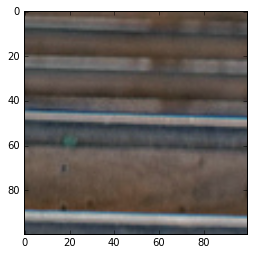

(0, 100)
(100, 200)


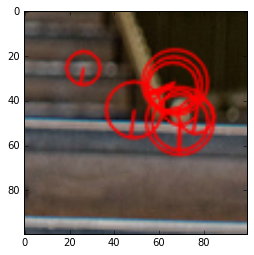

(0, 100)
(200, 300)


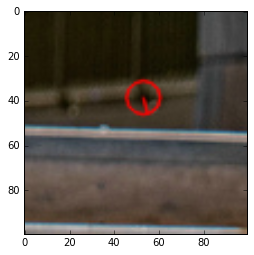

(0, 100)
(300, 400)


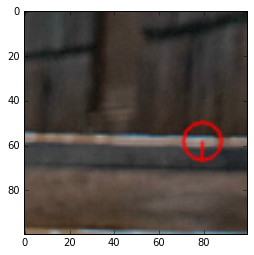

(0, 100)
(400, 500)


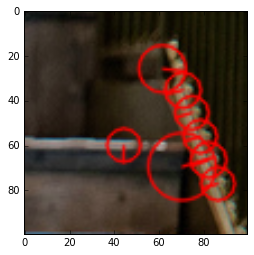

(0, 100)
(500, 600)


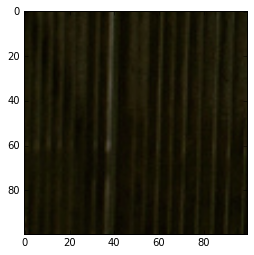

(100, 200)
(0, 100)


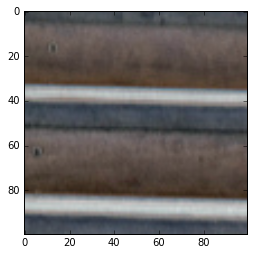

(100, 200)
(100, 200)


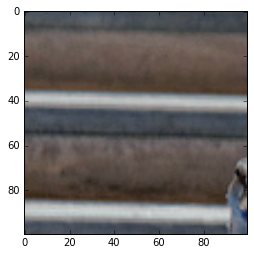

(100, 200)
(200, 300)


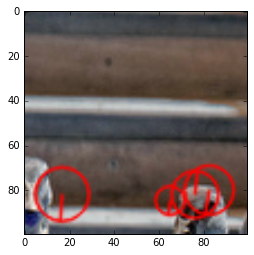

(100, 200)
(300, 400)


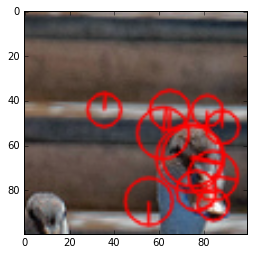

(100, 200)
(400, 500)


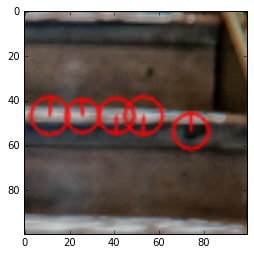

(100, 200)
(500, 600)


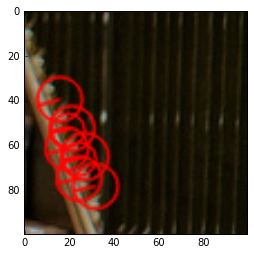

(200, 300)
(0, 100)


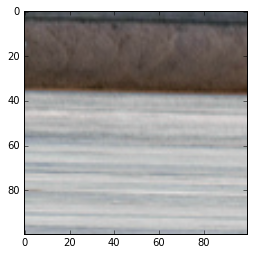

(200, 300)
(100, 200)


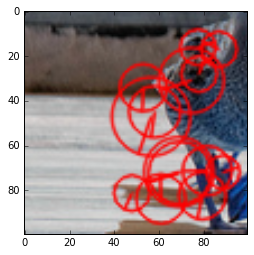

(200, 300)
(200, 300)


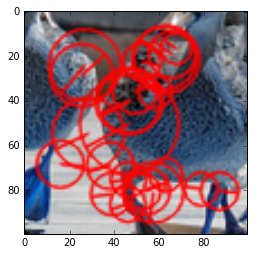

(200, 300)
(300, 400)


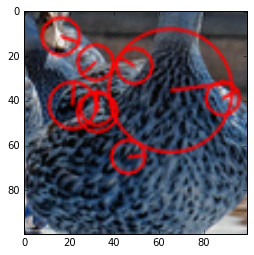

(200, 300)
(400, 500)


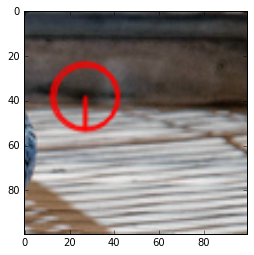

(200, 300)
(500, 600)


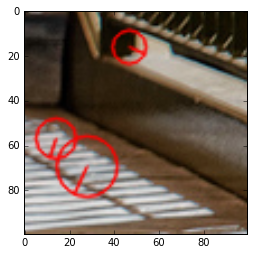

(300, 400)
(0, 100)


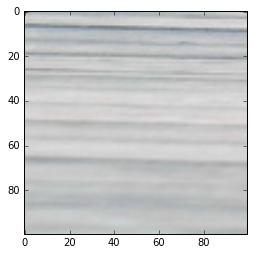

(300, 400)
(100, 200)


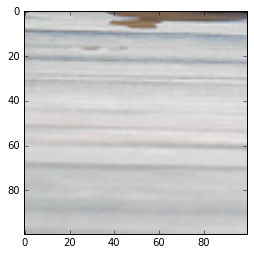

(300, 400)
(200, 300)


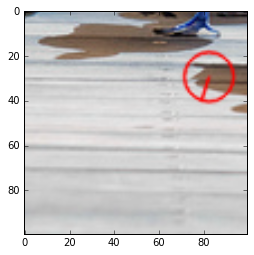

(300, 400)
(300, 400)


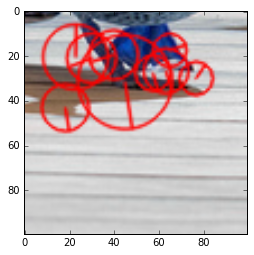

(300, 400)
(400, 500)


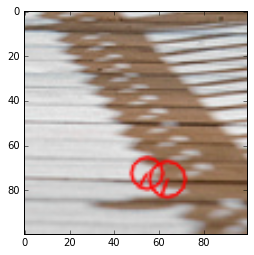

(300, 400)
(500, 600)


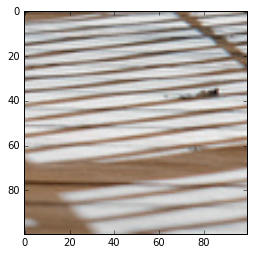

('counter', 25)


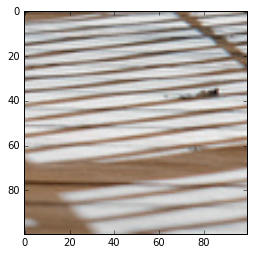

In [72]:
(duck_corpus,kp_corpus) = fromImageToCellsToCorpus(cluster,'duck.jpg',100,2000)

In [68]:
duck_corpus

[array([], shape=(0, 0), dtype=float64),
 array([14, 18, 19, 19,  0,  5,  5, 12,  5], dtype=int32),
 array([15], dtype=int32),
 array([12], dtype=int32),
 array([12, 12, 12, 11, 12, 12, 12, 11], dtype=int32),
 array([], shape=(0, 0), dtype=float64),
 array([], shape=(0, 0), dtype=float64),
 array([], shape=(0, 0), dtype=float64),
 array([18, 13, 19,  5], dtype=int32),
 array([ 1, 12, 11,  5, 11,  5,  5, 12, 12, 12, 11], dtype=int32),
 array([12, 11, 12, 12, 12], dtype=int32),
 array([12, 12, 16, 11,  5, 16,  5, 11], dtype=int32),
 array([], shape=(0, 0), dtype=float64),
 array([17, 17,  0,  5, 15, 17,  8,  2, 17, 11,  0, 15, 18,  2],
       dtype=int32),
 array([13, 17, 14,  4,  2,  4,  3,  2,  0, 10,  8, 11,  7,  1, 14, 14,  7,
         7,  9, 18,  1, 16, 11,  1], dtype=int32),
 array([10, 10,  6,  1, 15,  8, 19,  0, 15], dtype=int32),
 array([16, 16], dtype=int32),
 array([16,  7, 12], dtype=int32),
 array([], shape=(0, 0), dtype=float64),
 array([], shape=(0, 0), dtype=float64),
 ar

In [23]:
dict_topics,dict_docs, corpus_topic_dict = generateTopicsFromCorpus(duck_corpus, vocab , 2, .001 , 1 , 10000)

NameError: name 'duck_corpus' is not defined

In [2]:
(duck_corpus,kp_corpus) = fromImageToCellsToCorpus(cluster,'outdoors.jpg',140,5000)

NameError: name 'fromImageToCellsToCorpus' is not defined

('Lists', [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [2, 2], [1, 1, 1, 1, 1], [1, 1], [1], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [], [], [], [], [], [], [], [], [1], [], [], [], [], [2, 2, 2], [2], [1, 1], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1], [2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2], [1], [2, 2], [2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1], [], [], [], [], [], [], [], [], [], [], [1], [2], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

2
[0 1 5 6 7]
('keypoints', 11)
('word_list', 0)
1
[]
('keypoints', 0)
2
[]
('keypoints', 0)
('word_list', 0)
1
[]
('keypoints', 0)
2
[]
('keypoints', 0)
('word_list', 0)
1
[]
('keypoints', 0)
2
[]
('keypoints', 0)
('word_list', 0)
1
[]
('keypoints', 0)
2
[]
('keypoints', 0)
('word_list', 0)
1
[]
('keypoints', 0)
2
[]
('keypoints', 0)
('word_list', 0)
1
[]
('keypoints', 0)
2
[]
('keypoints', 0)
('word_list', 0)
1
[]
('keypoints', 0)
2
[]
('keypoints', 0)
('word_list', 0)
1
[]
('keypoints', 0)
2
[]
('keypoints', 0)
('word_list', 0)
1
[]
('keypoints', 0)
2
[]
('keypoints', 0)
('word_list', 0)
1
[]
('keypoints', 0)
2
[]
('keypoints', 0)
('word_list', 1)
1
[0]
('keypoints', 1)
2
[]
('keypoints', 1)
('word_list', 1)
1
[]
('keypoints', 1)
2
[0]
('keypoints', 1)
('word_list', 6)
1
[0 1 2 3 4 5]
('keypoints', 6)
2
[]
('keypoints', 6)
('word_list', 7)
1
[0 1 2 3 4 5 6]
('keypoints', 7)
2
[]
('keypoints', 7)
('word_list', 27)
1
[ 0  1  2  3  4  6  7 10 11 12 13 14 15 16 18 19 20 21 22 23 25 26]


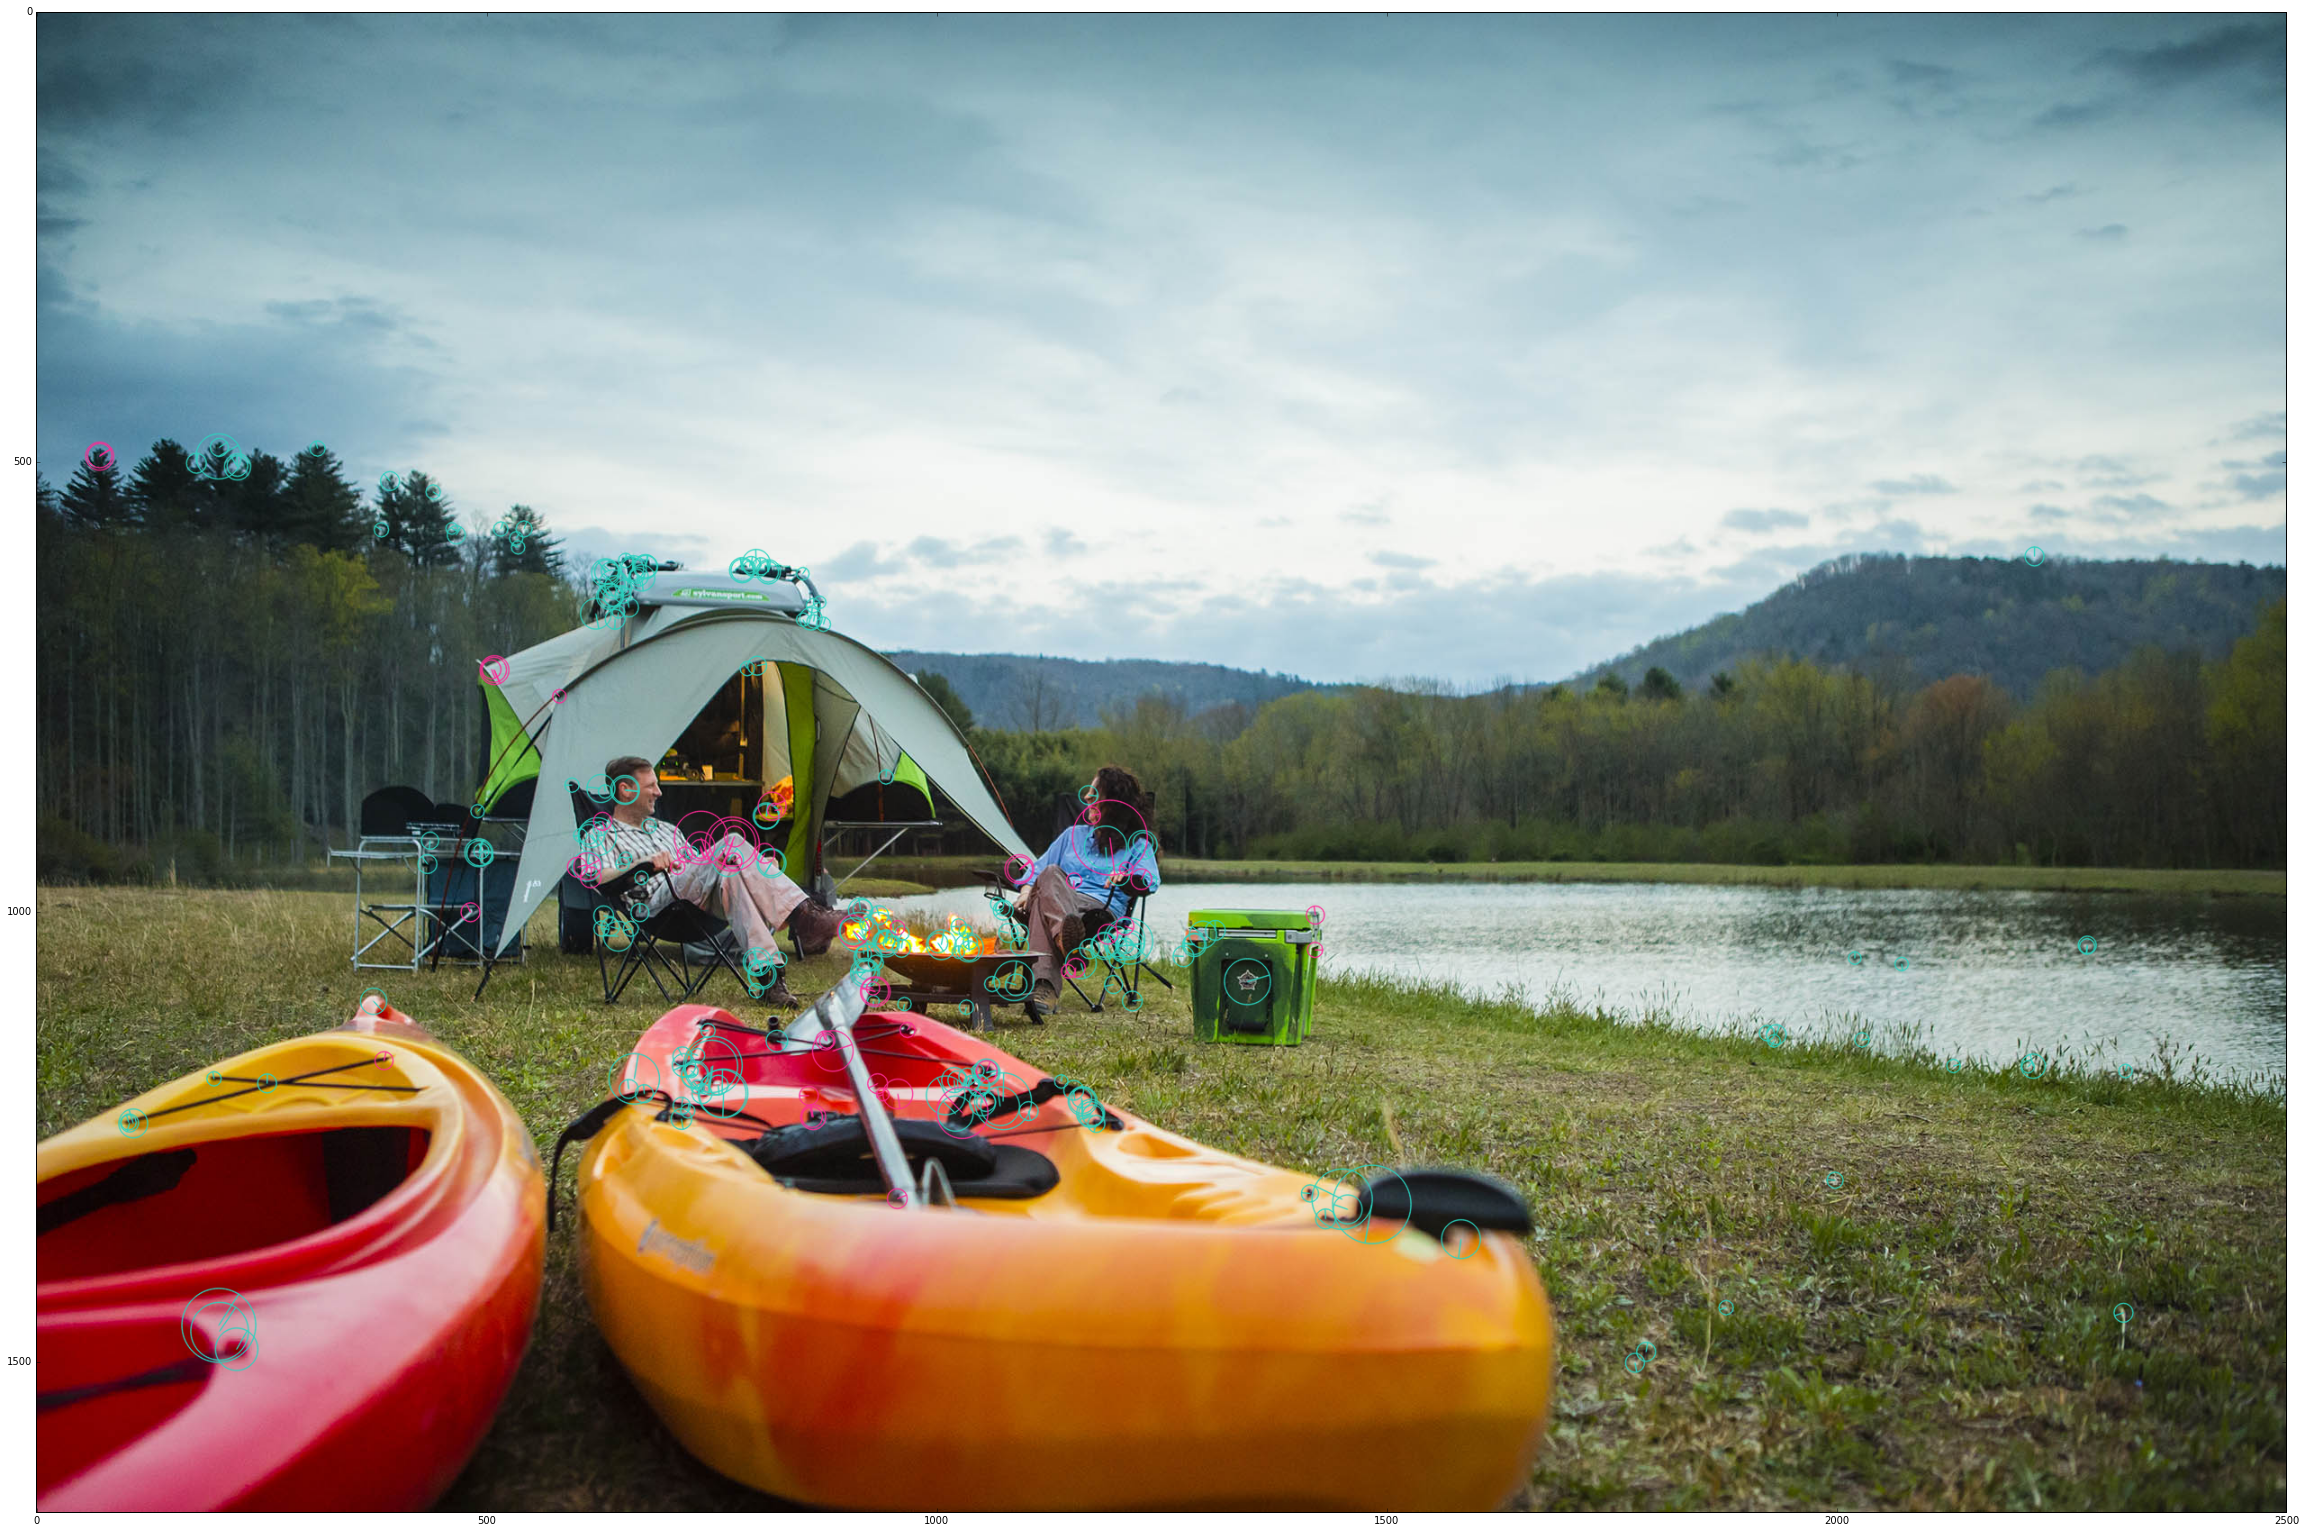

array([[[ 84,  72,  44],
        [ 83,  71,  43],
        [ 82,  70,  42],
        ...,
        [112, 100,  66],
        [110,  98,  64],
        [108,  96,  62]],

       [[ 84,  72,  44],
        [ 83,  71,  43],
        [ 82,  70,  42],
        ...,
        [110,  98,  64],
        [109,  97,  63],
        [107,  95,  61]],

       [[ 83,  71,  43],
        [ 82,  70,  42],
        [ 81,  69,  41],
        ...,
        [108,  96,  62],
        [107,  95,  61],
        [106,  94,  60]],

       ...,

       [[ 97,  75, 181],
        [ 99,  76, 182],
        [100,  77, 183],
        ...,
        [ 32,  40,  40],
        [ 30,  38,  38],
        [ 29,  37,  37]],

       [[103,  81, 187],
        [104,  81, 187],
        [106,  83, 189],
        ...,
        [ 32,  40,  40],
        [ 30,  38,  38],
        [ 29,  37,  37]],

       [[103,  81, 187],
        [104,  81, 187],
        [106,  83, 189],
        ...,
        [ 32,  40,  40],
        [ 30,  38,  38],
        [ 29,  37,  37]]

In [148]:
displayTopicModelling(corpus_topic_dict , 2 ,kp_corpus , 'outdoors.jpg')

In [ ]:
def topicModelling(current_frame , spatial_neighbourhood , temporal_neighbourhood , dict_topics , dict_docs ,  ) 

In [32]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
no_of_topics = 2
topic_color_dict = topicToColor(no_of_topics)
count = 0
duck_corpus = []
kp_corpus = []
dict_topics =  {}
dict_docs = {}
corpus_topic_dict = {}
alpha = 0.001
beta = 1
n_iter = 10
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    #print (type(frame))
    if count==0:
    # Our operations on the frame come here
        (duck_corpus,kp_corpus) = fromImageToCellsToCorpus(cluster,frame,100,200)
        #print("KPIIIII", len(kp_corpus))
        dict_topics,dict_docs, corpus_topic_dict = generateTopicsFromCorpus(duck_corpus, vocab , 2, .001 , 1 , 100)
    # Display the resulting frame
    else:
        (duck_corpus,kp_corpus) = fromImageToCellsToCorpus(cluster,frame,100,200)
        dict_docs, dict_topics,corpus_topic_dict = inferTopicsOfNewObservations( duck_corpus , dict_topics , dict_docs ,no_of_topics , alpha , beta)
        #print("CORPUS_TOPIC_DICTTTTTTTTTT",corpus_topic_dict)
        dict_topics,dict_docs, corpus_topic_dict = updateTopicsFromCorpus(duck_corpus , vocab ,dict_topics, dict_docs , corpus_topic_dict ,no_of_topics , alpha , beta , n_iter)
    count = count+1
    #print("KPIIIII")
    #print(corpus_topic_dict)
    #print(kp_corpus)
    out_frame = displayTopicModelling(corpus_topic_dict , 2 ,kp_corpus , frame,topic_color_dict)
    cv2.imshow('frame',out_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

('created_topic_dict', {'topic1': {'11': 0, '10': 0, '13': 0, '12': 0, '15': 0, '14': 0, '17': 0, '16': 0, '19': 0, '18': 0, 'total_words': 0, '1': 0, '0': 0, '3': 0, '2': 0, '5': 0, '4': 0, '7': 0, '6': 0, '9': 0, '8': 0}, 'topic2': {'11': 0, '10': 0, '13': 0, '12': 0, '15': 0, '14': 0, '17': 0, '16': 0, '19': 0, '18': 0, 'total_words': 0, '1': 0, '0': 0, '3': 0, '2': 0, '5': 0, '4': 0, '7': 0, '6': 0, '9': 0, '8': 0}})
('TYPE OF CORPUS', <type 'list'>)
[]
[]
[]
[]
[]
[]
[]
[]
[]
[ 6  6 15 17]
[0]
[ 9  2 16  1  2  2]
[ 6  4 15 17  0 17 15  6 16]
[14  1  6 17 17 16 16 19]
[2]
[17 16 15 16  2]
[ 2  0 16  2  2 16  2 10 16]
[17 17 16  1  1 14  2 13]
[ 6  6  6 17 10  8  5]
[ 8  5  1  8 11 12 11  6  8 10 15  6 16 16  6]
[10  3  3 13  5 10 17 17 16 10  3  8  2  1  3 11]
[17]
[14  4 18 18  0 11  4 14 11 19  2  3 14  0 14]
[ 4  6  8  8 19 12  8  7 13  1 19 13  2  7  7 14 14 13 13  7 13 11 16 11
 14 11  9  6  9 14 14  6 19 10 13 19  7 18 19 18  6 14 14]


In [37]:
corpus_topic_dict = inferTopicsOfNewObservations( duck_corpus , dict_topics , dict_docs ,no_of_topics , alpha , beta)

<type 'int'>
2
('i', 6)
('w', 16)
('k', 1)
('prob_arr', array([0.        , 0.02454601, 0.        ]))
('prob_arr_normalized', array([0., 1., 0.]))
('i', 6)
('w', 16)
('k', 2)
('prob_arr', array([0.00000000e+00, 1.00000000e+00, 4.22427035e-05]))
('prob_arr_normalized', array([0.00000000e+00, 9.99957759e-01, 4.22409192e-05]))
('i', 6)
('w', 16)
('k', 1)
('prob_arr', array([0.00000000e+00, 2.45460123e-02, 4.22409192e-05]))
('prob_arr_normalized', array([0.        , 0.99828207, 0.00171793]))
('i', 6)
('w', 16)
('k', 2)
('prob_arr', array([0.00000000e+00, 9.98282069e-01, 4.22427035e-05]))
('prob_arr_normalized', array([0.00000000e+00, 9.99957686e-01, 4.23136079e-05]))
('i', 6)
('w', 2)
('k', 1)
('prob_arr', array([0.00000000e+00, 8.18200409e-03, 4.23136079e-05]))
('prob_arr_normalized', array([0.        , 0.99485506, 0.00514494]))
('i', 6)
('w', 2)
('k', 2)
('prob_arr', array([0.00000000e+00, 9.94855062e-01, 6.22119816e-05]))
('prob_arr_normalized', array([0.00000000e+00, 9.99937470e-01, 6.2

('i', 13)
('w', 0)
('k', 2)
('prob_arr', array([0.        , 0.07574372, 0.00248174]))
('prob_arr_normalized', array([0.        , 0.96827447, 0.03172553]))
('i', 13)
('w', 11)
('k', 1)
('prob_arr', array([0.        , 0.00188815, 0.03172553]))
('prob_arr_normalized', array([0.        , 0.05617221, 0.94382779]))
('i', 13)
('w', 11)
('k', 2)
('prob_arr', array([0.        , 0.05617221, 0.0223357 ]))
('prob_arr_normalized', array([0.       , 0.7154975, 0.2845025]))
('i', 13)
('w', 2)
('k', 1)
('prob_arr', array([0.        , 0.00377631, 0.2845025 ]))
('prob_arr_normalized', array([0.       , 0.0130995, 0.9869005]))
('i', 13)
('w', 2)
('k', 2)
('prob_arr', array([0.        , 0.0130995 , 0.20102127]))
('prob_arr_normalized', array([0.        , 0.06117811, 0.93882189]))
('i', 13)
('w', 2)
('k', 1)
('prob_arr', array([0.        , 0.00377631, 0.93882189]))
('prob_arr_normalized', array([0.        , 0.00400628, 0.99599372]))
('i', 13)
('w', 2)
('k', 2)
('prob_arr', array([0.        , 0.00400628, 0.

('w', 6)
('k', 1)
('prob_arr', array([0.        , 0.10231342, 0.01817259]))
('prob_arr_normalized', array([0.        , 0.84917261, 0.15082739]))
('i', 18)
('w', 6)
('k', 2)
('prob_arr', array([0.        , 0.84917261, 0.0027113 ]))
('prob_arr_normalized', array([0.        , 0.99681728, 0.00318272]))
('i', 18)
('w', 12)
('k', 1)
('prob_arr', array([0.        , 0.07795309, 0.00318272]))
('prob_arr_normalized', array([0.        , 0.96077299, 0.03922701]))
('i', 18)
('w', 12)
('k', 2)
('prob_arr', array([0.00000000e+00, 9.60772986e-01, 6.77825969e-04]))
('prob_arr_normalized', array([0.00000000e+00, 9.99294997e-01, 7.05003273e-04]))
('i', 18)
('w', 10)
('k', 1)
('prob_arr', array([0.        , 0.07308102, 0.000705  ]))
('prob_arr_normalized', array([0.       , 0.9904453, 0.0095547]))
('i', 18)
('w', 10)
('k', 2)
('prob_arr', array([0.00000000e+00, 9.90445300e-01, 6.77825969e-04]))
('prob_arr_normalized', array([0.00000000e+00, 9.99316103e-01, 6.83896835e-04]))
('i', 18)
('w', 10)
('k', 1)
('

ValueError: probabilities are not non-negative

In [42]:
dict_topics['topic1']['16'] = 0
dict_topics['topic1']['total_words']=296

In [45]:
dict_docs['doc1']['topic1'] = 0
dict_docs['doc1']['total_topics'] = 2

In [1]:
dict_topics

NameError: name 'dict_topics' is not defined

In [29]:
cap.release()
cv.destroyAllWindows()

In [31]:
cap = cv.VideoCapture(4)